# Data Preparation and Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlretrieve

In [2]:
#Retrieving the data from Github
data_url = 'https://raw.githubusercontent.com/she-code-africa/SCAMP-Cohort6-Technical-Assessment/master/intermediate/fake_job_postings.csv'

In [3]:
#Downloading the data
urlretrieve(data_url, 'fake_job_postings.csv') 

('fake_job_postings.csv', <http.client.HTTPMessage at 0x7f718c0b1c10>)

In [4]:
#Loading the downloaded data
fake_jobposts = pd.read_csv('fake_job_postings.csv') 

In [5]:
#First 5 rows
fake_jobposts.head() 

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


We see that this is a classifcation dataset-this is because it predicts a dicrete output variable


In [6]:
fake_jobposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

We see that there are 17880 values, 18 columns and missing data in 11 columns.

In [7]:
fake_jobposts.shape

(17880, 18)

In [8]:
fake_jobposts.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [9]:
#check for duplicated data
fake_jobposts.duplicated().sum()

0

There is no duplicated data


In [10]:
#check null values in the dataset
fake_jobposts.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
# Separating categorical data and numerical data
fake_num = fake_jobposts[['telecommuting','has_company_logo','has_questions',
                       'fraudulent','salary_range']]
fake_cat = fake_jobposts[['title','location','department','company_profile',
                       'description','requirements','benefits','employment_type',
                       'required_experience','required_education','industry',
                       'function']]

Since we are looking for fake job postings, I am focusing on industry and fradulent colummns

In [12]:
fake_jobposts['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [13]:
fake_jobposts['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In the fraudulent column, data is categorized as 0 and 1. 0 being non-corrupt  and 1 being corrupt data 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


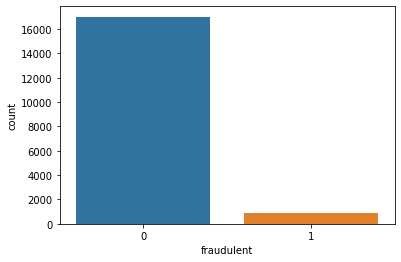

In [14]:
sns.countplot('fraudulent',data=fake_jobposts)

# Data Cleaning 

In [15]:
#Drop null values
fake_jobposts = fake_jobposts.dropna()

In [16]:
fake_jobposts.shape

(774, 18)

In [17]:
#Including rows which are fake job postings
industry_df = fake_jobposts[fake_jobposts['fraudulent']== 1]

#To check industry column values
industry_df['industry'].value_counts()

Oil & Energy                            17
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Hospital & Health Care                   4
Management Consulting                    3
Retail                                   3
Insurance                                2
Telecommunications                       2
Human Resources                          2
Transportation/Trucking/Railroad         2
Construction                             1
Security and Investigations              1
Warehousing                              1
Logistics and Supply Chain               1
Accounting                               1
Information Services                     1
Mechanical or Industrial Engineering     1
Computer Networking                      1
Name: industry, dtype: int64

In [18]:
#new dataframe with the columns industry and fraudulent
fraud_count =fake_jobposts.groupby('industry', as_index=False)['fraudulent'].sum()
fraud_count.head(10)


,industry,fraudulent
0,Accounting,1
1,Apparel & Fashion,0
2,Automotive,0
3,Aviation & Aerospace,0
4,Banking,0
5,Biotechnology,0
6,Civil Engineering,0
7,Commercial Real Estate,0
8,Computer & Network Security,5
9,Computer Games,0


# Visualizing the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


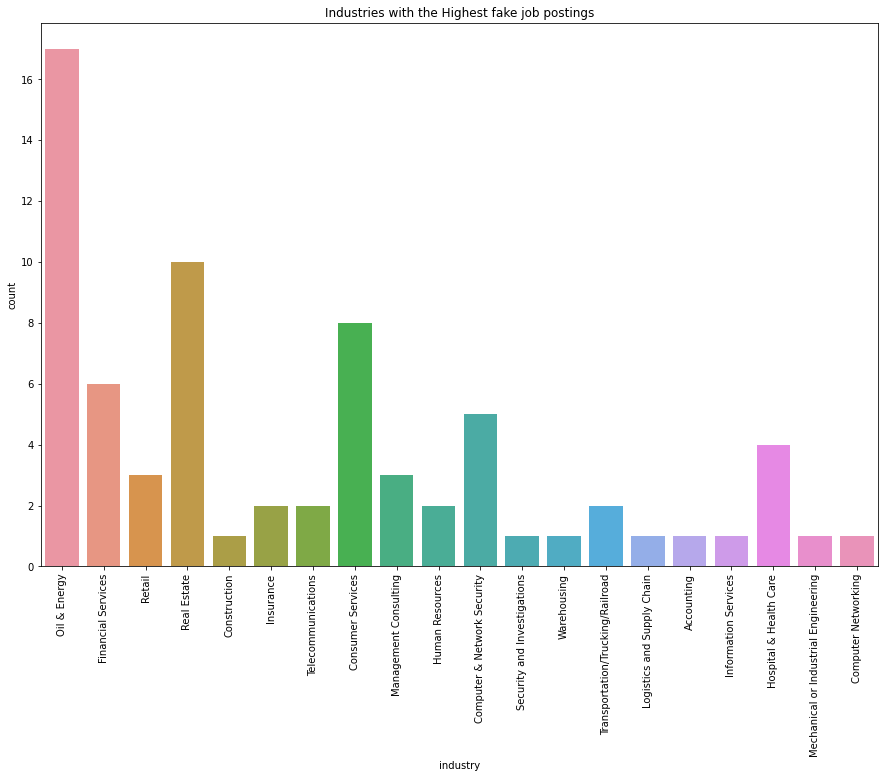

In [19]:
plt.subplots(figsize=(15,10))
sns.countplot('industry',data=industry_df)
plt.xticks(rotation=90)
plt.title('Industries with the Highest fake job postings')
plt.show()

Oil and Energy industry has the highest fake job postings as it has the hughest count of 17 as shown on the bar graph